In [1]:
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from lightgbm import LGBMClassifier
from joblib import load

In [2]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

In [3]:
ct_model = load('../models/db_ct_nxt_rnd_type.joblib')
t_model = load('../models/db_t_nxt_rnd_type.joblib')

## Input!

- map
- round
- ct_alive
- t_alive
- ct_winner	
- bomb_planted	
- ct_cons_wins	
- t_cons_wins	
- round_type

In [4]:
test = [0, 1, 2, 0, 1, 0, 3, 0, 2]
test_map = [0,0,0,1,0,0,0,0]

In [5]:
union = test + test_map
union

[0, 1, 2, 0, 1, 0, 3, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0]

In [6]:
df = pd.DataFrame(union).T
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1,2,0,1,0,3,0,2,0,0,0,1,0,0,0,0


In [7]:
df.columns = ['file','round','ct_alive','t_alive','ct_winner','bomb_planted','ct_cons_wins','t_cons_wins',
              'round_type','de_cache','de_cbble','de_dust2','de_inferno','de_mirage','de_nuke','de_overpass','de_train']

In [8]:
df

,file,round,ct_alive,t_alive,ct_winner,bomb_planted,ct_cons_wins,t_cons_wins,round_type,de_cache,de_cbble,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train
0,0,1,2,0,1,0,3,0,2,0,0,0,1,0,0,0,0


In [15]:
t_model.predict(df)[0]

1

In [24]:
t_model.predict_proba(df)[0]

array([3.30889937e-05, 5.16180232e-01, 3.42598435e-01, 1.41175068e-01,
       1.31756950e-05])

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
test = t_model.predict_proba(df)[0][:-1]

In [37]:
test

array([3.30889937e-05, 5.16180232e-01, 3.42598435e-01, 1.41175068e-01])

In [38]:
test_df = pd.DataFrame(test).T
test_df.columns = ['a', 'b', 'c', 'd']

In [39]:
test_df

,a,b,c,d
0,0.000033,0.51618,0.342598,0.141175


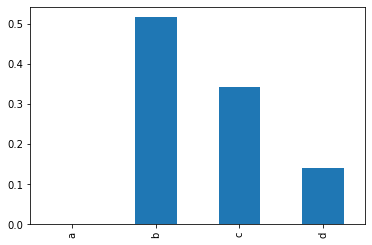

In [51]:
test_df.iloc[0].plot(kind='bar')
plt.show()

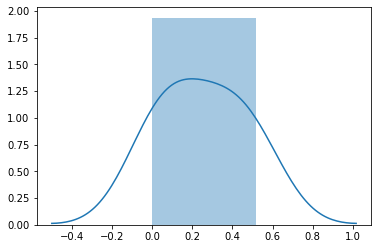

In [48]:
sns.distplot(test_df)

In [13]:
df.loc[0, 'de_cache'] = 1

In [14]:
df

,file,round,ct_alive,t_alive,ct_winner,bomb_planted,ct_cons_wins,t_cons_wins,round_type,de_cache,de_cbble,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train
0,0,1,2,0,1,0,3,0,2,1,0,0,1,0,0,0,0
